# Alpaca Japan

## Libraries

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

## Kmeans Function Creation

In [2]:
def kmeans_function(data, n_clusters, max_iter, seed = 2021):
    # Set seed to get the same outcome
    random.seed(seed)
    # Creation of n random centroids
    cent = random.sample(values, n_clusters)
    
    # Temporal table for the study
    temp = pd.DataFrame(data,columns = ['X', 'Y'])
    # Create column fot the cluster_id
    temp['Cluster_id'] = ''
    
    # Number of iterations
    for j in range(max_iter):
        
        for i in range(len(data)):
            dist_0 = 100
            
            # Assign the cluster_id
            for cen in range(n_clusters):
                # Euclidean distance
                dist = np.sqrt((data[i][0] - cent[cen][0])**2 + (data[i][1] - cent[cen][1])**2)
                # Comparation of distances
                if dist < dist_0:
                    dist_0 = dist
                    temp.loc[i, 'Cluster_id'] = cen
        # Save the centroids in order to chek it later if it does not change
        cent_old = cent
        cent = []
        
        # Change position of the centroids
        for cat in range(n_clusters):
            df_cat = temp[temp['Cluster_id'] == cat].copy()
            x_cat = df_cat['X'].mean()
            y_cat = df_cat['Y'].mean()
            coord = (x_cat, y_cat)
            cent.append(coord)
        # Check if the centroids have not changed
        if cent == cent_old:
            # Show the number  of iterations needed
            print('Number of iterations needed: {}'.format(j))
            
            # Visualization
            df_cent = pd.DataFrame(cent)
            plt.scatter(temp.iloc[:, 0], temp.iloc[:, 1], c = temp['Cluster_id'], cmap = 'viridis')
            plt.scatter(df_cent.iloc[:, 0], df_cent.iloc[:, 1], c = 'black', s = 200, alpha = 0.5, marker = 'x')
            plt.title('Kmeans plot (Number of clusters = {})'.format(n_clusters), size = 15)
            # Break the for loop
            break
            
    # Return the Cluster if and the position of the centroids
    return temp['Cluster_id'].to_list(),cent

## Model Testing

In [3]:
# Generate random numbers in the range [0.0, 1.0)
values = []
random.seed(2021)
for i in range(100):
    values.append((random.random(),random.random()))

Number of iterations needed: 3


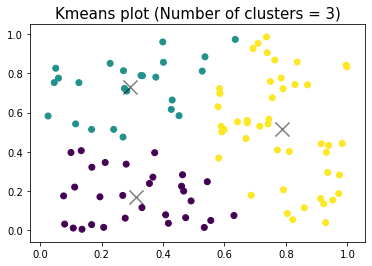

In [4]:
# Testing the function
cluster_id, centroids = kmeans_function(values, 3, 100)

In [5]:
# Check the outcome
cluster_id[:5], centroids

([2, 0, 1, 0, 1],
 [(0.31329144191349106, 0.17126365039424102),
  (0.29188664510336837, 0.7311814820703465),
  (0.7856159426546929, 0.5159432424699582)])